In [2]:
# Import pandas
import pandas as pd
import geopandas
import geoplot
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [6]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340


####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

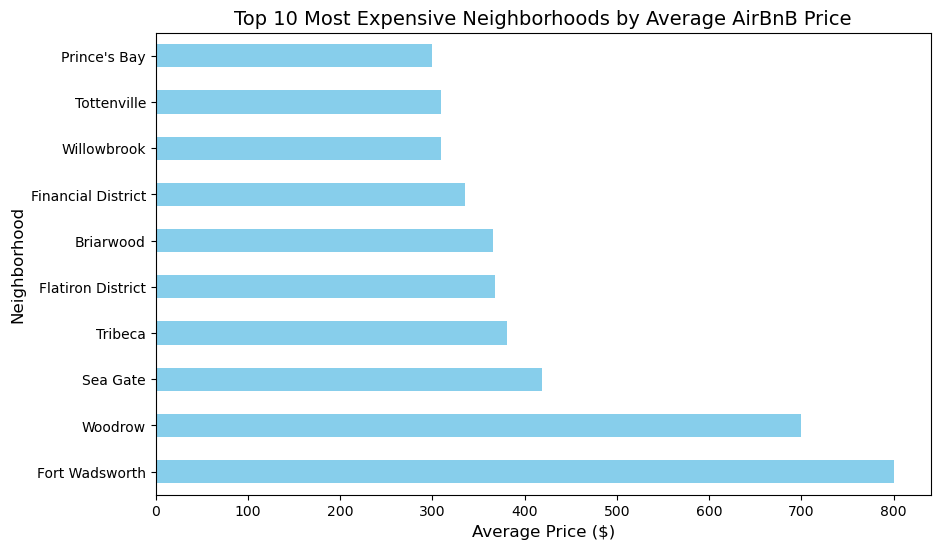

In [54]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

dfmean= df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
#dfmean= dfmean.sort_values(by='price',ascending=False)
dfmean

dfmean.plot.barh(color='skyblue', figsize=(10, 6))

plt.title('Top 10 Most Expensive Neighborhoods by Average AirBnB Price', fontsize=14)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()


In [55]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price

dfmean= dfmean.reset_index()
dfmean.columns=['neighbourhood','price']
dfmean


,neighbourhood,price
0,Fort Wadsworth,800.000000
1,Woodrow,700.000000
2,Sea Gate,418.230769
3,Tribeca,381.107143
4,Flatiron District,367.415584
5,Briarwood,366.162162
6,Financial District,335.385057
7,Willowbrook,309.000000
8,Tottenville,309.000000
9,Prince's Bay,300.000000


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

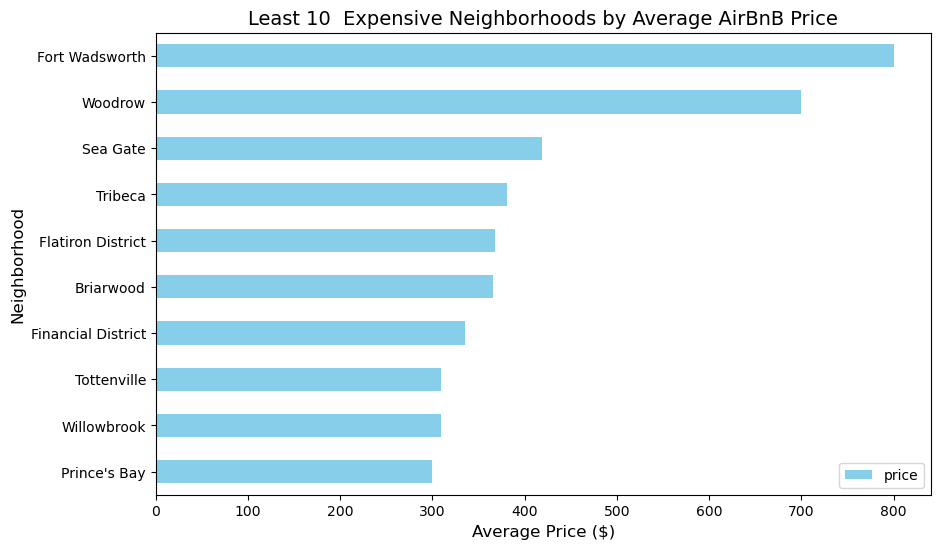

In [72]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.


dfmean= dfmean.sort_values(by='price', ascending=True)

dfmean.plot.barh(x='neighbourhood', y='price', color='skyblue', figsize=(10, 6))


plt.title('Least 10  Expensive Neighborhoods by Average AirBnB Price', fontsize=14)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()



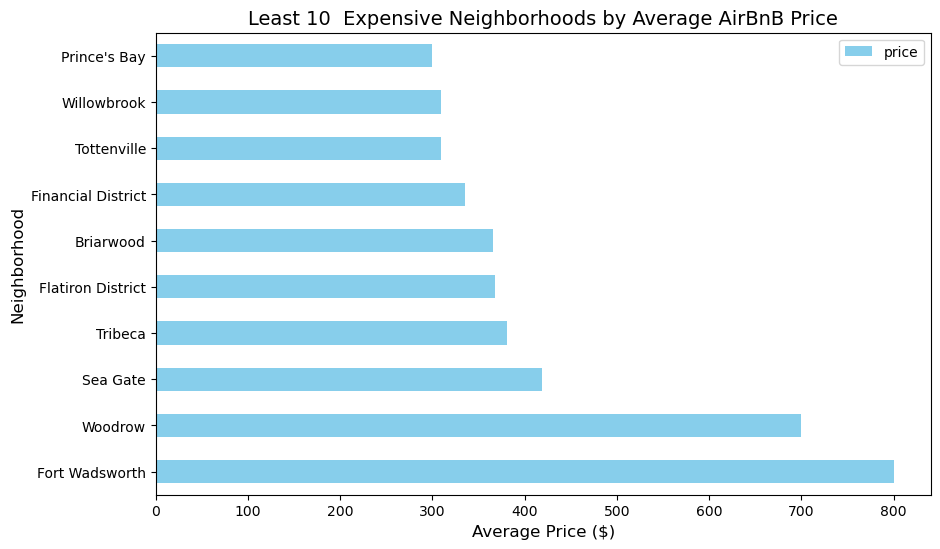

In [73]:
# we also would like to have the corresponding pivot table of the lowest 10


dfmean= dfmean.sort_values(by='price', ascending=True)

dfmean.plot.barh(x='neighbourhood', y='price', color='skyblue', figsize=(10, 6)) .invert_yaxis()


plt.title('Least 10  Expensive Neighborhoods by Average AirBnB Price', fontsize=14)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()

#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!